In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # 'from' eklenmeli
import warnings  # 'warnings' kütüphanesi için doğru import
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
df=pd.read_csv("./USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


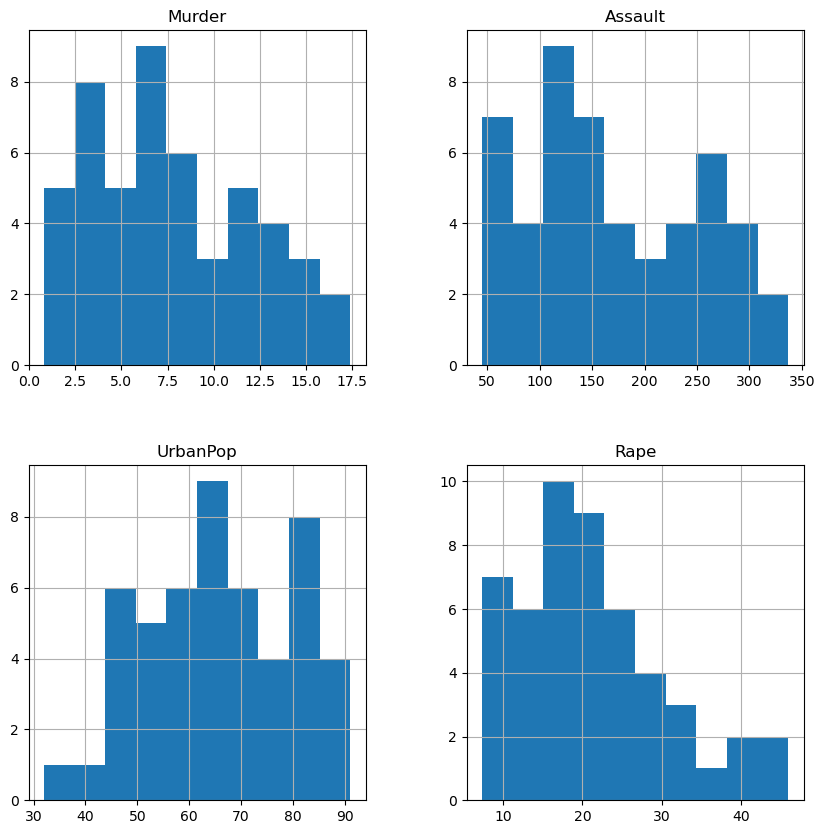

In [17]:
df.hist(figsize=(10,10));

In [19]:
kmeans=KMeans(n_clusters=4)

In [21]:
kmeans

KMeans(n_clusters=4)

In [23]:
k_fit=kmeans.fit(df)

In [25]:
k_fit.n_clusters

4

In [27]:
k_fit.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 12.13571429, 277.64285714,  68.78571429,  29.78571429],
       [  5.79411765, 129.64705882,  68.29411765,  18.8       ],
       [ 10.16666667, 202.22222222,  68.22222222,  23.32222222]])

In [29]:
k_fit.labels_

array([3, 1, 1, 3, 1, 3, 2, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1,
       0, 1, 3, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 3, 1, 0, 3, 3, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
#Kümelerin Görselleştirilmesi


In [31]:
k_means=KMeans(n_clusters=2).fit(df)

In [33]:
kumeler=k_means.labels_

In [35]:
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

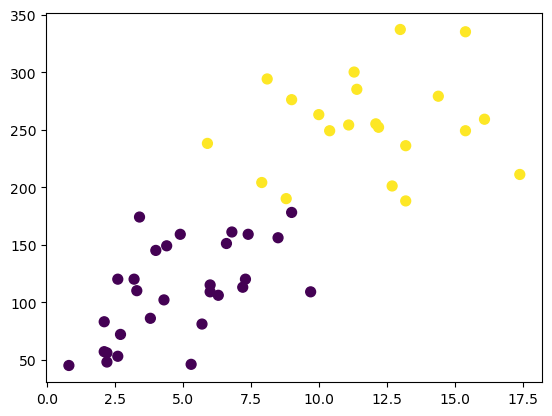

In [43]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kumeler, s=50, cmap='viridis')

In [45]:
merkezler=k_means.cluster_centers_

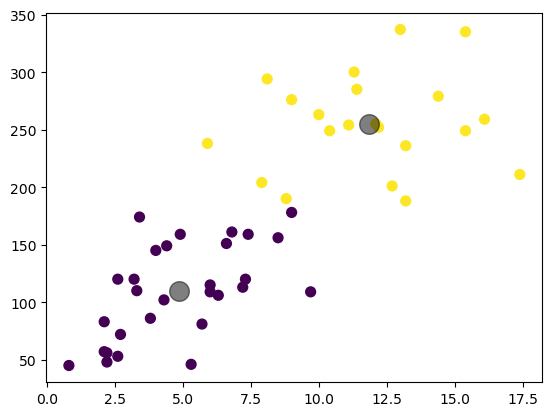

In [49]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kumeler, s=50, cmap='viridis')
plt.scatter(merkezler[:,0],merkezler[:,1], c="black", s=200, alpha=0.5);

In [51]:
#ELBOW YÖNTEMİ

In [65]:

# Elbow yöntemini uygulama
ssd = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)


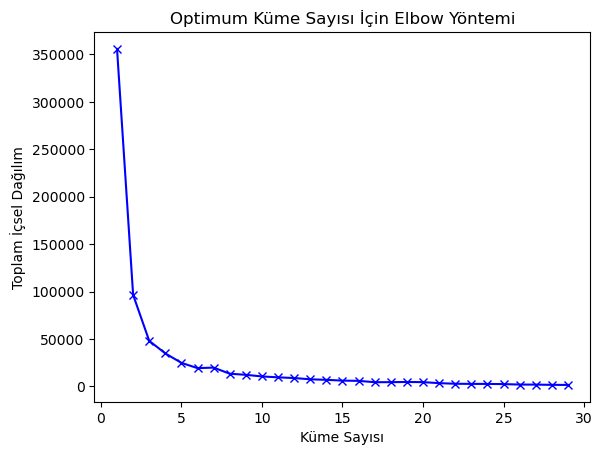

In [67]:

plt.plot(k_range, ssd, "bx-")
plt.xlabel("Küme Sayısı")
plt.ylabel("Toplam İçsel Dağılım")
plt.title("Optimum Küme Sayısı İçin Elbow Yöntemi")
plt.show()

In [69]:
!pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.6 MB/s eta 0:00:00a 0:00:01m


In [71]:
from yellowbrick.cluster import KElbowVisualizer

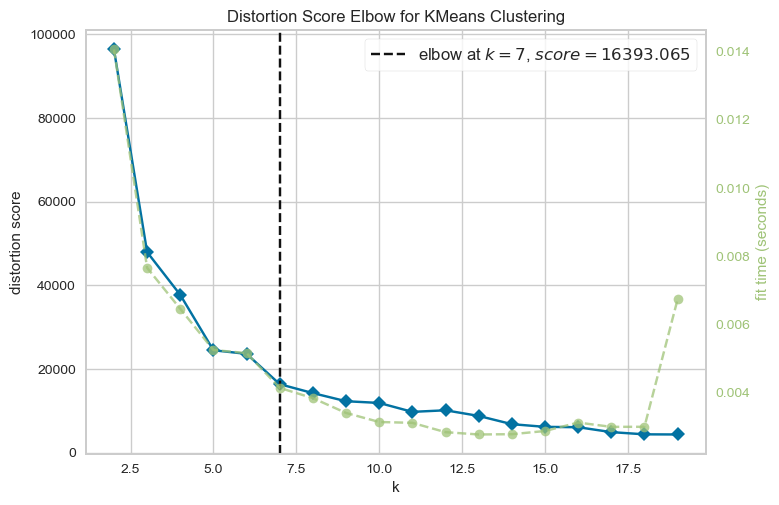

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans, k=(2,20))
visu.fit(df)
visu.poof()

In [79]:
kmeans = KMeans(n_clusters=4).fit(df)
kmeans

KMeans(n_clusters=4)

In [81]:
kumeler=kmeans.labels_

In [83]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,3
1,Alaska,2
2,Arizona,2
3,Arkansas,3
4,California,2
5,Colorado,3
6,Connecticut,1
7,Delaware,3
8,Florida,2
9,Georgia,3


In [85]:
df["Kume_No"]=kumeler

In [87]:
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,3
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,3
